In [78]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
from torch import nn, optim, Tensor, LongTensor
from torch.autograd import Variable as V
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader

In [6]:
# irisデータセットのロジスティック回帰のハイパーパラメータ
input_size = 4
n_classes = 3
n_epochs = 1000
# batch_size = 64
learning_rate = 0.01

In [8]:
# irisデータセットをロード
iris = load_iris()
X = iris.data
Y = iris.target
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [13]:
# trainデータとvalidationデータに分割、2;1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(100, 4)
(50, 4)
(100,)
(50,)


In [57]:
# データの正規化、平均0, 標準偏差1にする
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(np.mean(X_train, axis = 0))
print(np.std(X_train, axis = 0))
print(np.mean(X_test, axis = 0))
print(np.std(X_test, axis = 0))

[ 5.55111512e-19  2.22044605e-18 -1.77635684e-17 -1.66533454e-17]
[1. 1. 1. 1.]
[-0.12157058 -0.09181911 -0.01051334 -0.01279953]
[0.79240762 1.04871345 0.91674578 0.91830391]


In [58]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, n_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, n_classes)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [71]:
net = LogisticRegression(input_size, n_classes)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = learning_rate)

In [72]:
def train(X_train, Y_train):
    X_train = V(Tensor(X_train))
    Y_train = V(LongTensor(Y_train))
    
    Y_pred = net(X_train)
    loss = loss_fn(Y_pred, Y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return loss.data

In [73]:
def valid(X_test, Y_test):
    X_test = V(Tensor(X_test))
    Y_test = V(LongTensor(Y_test))
    
    Y_pred = net(X_test)
    loss = loss_fn(Y_pred, Y_test)
    
    _, predicted = torch.max(Y_pred.data, dim = 1)
    correct = (predicted == Y_test.data).float().sum()
    val_acc = correct / Y_test.size()[0]
    
    return loss.data, val_acc

In [74]:
losses = []
val_losses = []
val_acces = []
perm = np.arange(X_train.shape[0])
for epoch in range(n_epochs):
    np.random.shuffle(perm)
    X_train = X_train[perm]
    Y_train = Y_train[perm]
    loss = train(X_train, Y_train)
    val_loss, val_acc = valid(X_test, Y_test)
    
    if (epoch + 1) % 50 == 0:
        print('epoch[%d/%d] loss:%1.4f val_loss:%1.4f val_acc:%1.4f' % (epoch+1, n_epochs, loss, val_loss, val_acc))
        
    losses.append(loss)
    val_losses.append(val_loss)
    val_acces.append(val_acc)

epoch[50/1000] loss:0.4618 val_loss:0.4867 val_acc:0.8600
epoch[100/1000] loss:0.3589 val_loss:0.3861 val_acc:0.8600
epoch[150/1000] loss:0.2999 val_loss:0.3270 val_acc:0.9000
epoch[200/1000] loss:0.2560 val_loss:0.2831 val_acc:0.9400
epoch[250/1000] loss:0.2223 val_loss:0.2494 val_acc:0.9600
epoch[300/1000] loss:0.1961 val_loss:0.2231 val_acc:0.9600
epoch[350/1000] loss:0.1756 val_loss:0.2023 val_acc:0.9600
epoch[400/1000] loss:0.1593 val_loss:0.1854 val_acc:0.9400
epoch[450/1000] loss:0.1461 val_loss:0.1714 val_acc:0.9400
epoch[500/1000] loss:0.1352 val_loss:0.1598 val_acc:0.9400
epoch[550/1000] loss:0.1262 val_loss:0.1499 val_acc:0.9400
epoch[600/1000] loss:0.1185 val_loss:0.1413 val_acc:0.9600
epoch[650/1000] loss:0.1120 val_loss:0.1339 val_acc:0.9600
epoch[700/1000] loss:0.1063 val_loss:0.1274 val_acc:0.9600
epoch[750/1000] loss:0.1014 val_loss:0.1216 val_acc:0.9600
epoch[800/1000] loss:0.0970 val_loss:0.1164 val_acc:0.9600
epoch[850/1000] loss:0.0932 val_loss:0.1118 val_acc:0.960

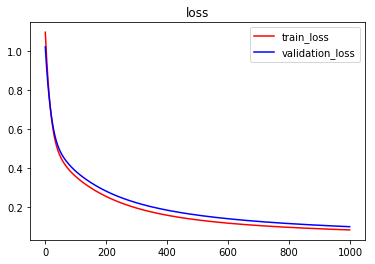

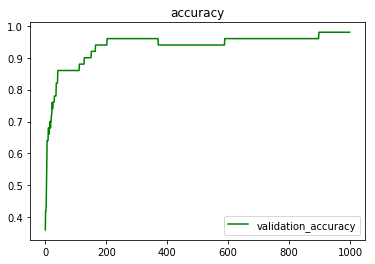

In [75]:
%matplotlib inline
plt.plot(range(n_epochs), losses, 'r-', label = 'train_loss')
plt.plot(range(n_epochs), val_losses, 'b-', label = 'validation_loss')
plt.title('loss')
plt.legend()
plt.show()

plt.plot(range(n_epochs), val_acces, 'g-', label = 'validation_accuracy')
plt.title('accuracy')
plt.legend()
plt.show()

In [109]:
# mnistデータセットのロジスティック回帰のハイパーパラメータ
input_size = 784
n_classes = 10
n_epochs = 10
batch_size = 64
learning_rate = 0.01

In [110]:
# mnistデータセットをロード
mnist = fetch_mldata('MNIST original')
X = mnist.data
Y = mnist.target
print(X.shape)
print(Y.shape)

(70000, 784)
(70000,)


In [111]:
# trainデータとvalidationデータに分割、6;1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/7, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [117]:
# データの正規化、平均0, 標準偏差1にする
scaler = StandardScaler()
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [118]:
ds_train = TensorDataset(Tensor(X_train), LongTensor(Y_train))
ds_test = TensorDataset(Tensor(X_test), LongTensor(Y_test))
train_loader = DataLoader(ds_train, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(ds_test, batch_size = batch_size, shuffle = False)

In [119]:
net = LogisticRegression(input_size, n_classes)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = learning_rate)

In [120]:
losses = []
val_losses = []
val_acces = []
for epoch in range(n_epochs):
    running_loss = 0
    for i, (x, y) in enumerate(train_loader):
        running_loss += train(x, y)
    loss = running_loss / i
    
    running_loss = 0
    running_acc = 0
    for i, (x, y) in enumerate(test_loader):
        loss_temp, acc_temp = valid(x, y)
        running_loss += loss_temp
        running_acc += acc_temp
    val_loss = running_loss / i
    val_acc = running_acc /i
    # val_loss, val_acc = valid(X_test, Y_test)
    
    # if (epoch + 1) % 1 == 0:
    print('epoch[%d/%d] loss:%1.4f val_loss:%1.4f val_acc:%1.4f' % (epoch+1, n_epochs, loss, val_loss, val_acc))
        
    losses.append(loss)
    val_losses.append(val_loss)
    val_acces.append(val_acc)

epoch[1/10] loss:0.7142 val_loss:0.6793 val_acc:0.9006
epoch[2/10] loss:0.6583 val_loss:0.6749 val_acc:0.8973
epoch[3/10] loss:0.5894 val_loss:0.7033 val_acc:0.9032
epoch[4/10] loss:0.5549 val_loss:0.7292 val_acc:0.9005
epoch[5/10] loss:0.5205 val_loss:0.7207 val_acc:0.8994
epoch[6/10] loss:0.5248 val_loss:0.7348 val_acc:0.9009
epoch[7/10] loss:0.5113 val_loss:0.7427 val_acc:0.9019
epoch[8/10] loss:0.5213 val_loss:0.7674 val_acc:0.9029
epoch[9/10] loss:0.5165 val_loss:0.7915 val_acc:0.9005
epoch[10/10] loss:0.5211 val_loss:0.8166 val_acc:0.9025


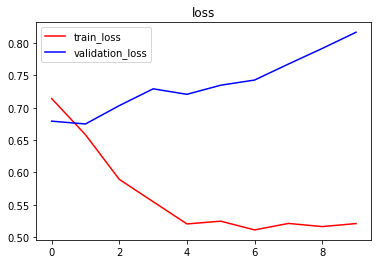

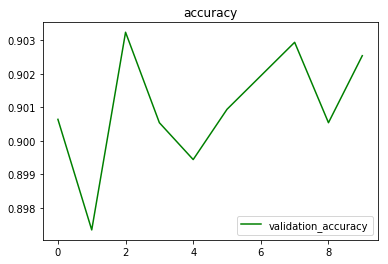

In [121]:
%matplotlib inline
plt.plot(range(n_epochs), losses, 'r-', label = 'train_loss')
plt.plot(range(n_epochs), val_losses, 'b-', label = 'validation_loss')
plt.title('loss')
plt.legend()
plt.show()

plt.plot(range(n_epochs), val_acces, 'g-', label = 'validation_accuracy')
plt.title('accuracy')
plt.legend()
plt.show()